# Imports

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score,classification_report, recall_score, precision_score
# ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
import xgboost as xgb

/home/pelle/anaconda3/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Data

In [3]:
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/network_features/'
file_names=os.listdir(p)

data = []
for name in file_names:
    data.append(pd.read_csv(p+name))

df_gf=pd.concat(data)
df_balanced = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/balanced_data_chunked10.csv')

df_gf.drop_duplicates(inplace=True)
df=df_balanced.join(df_gf.set_index('id'),on='id')
df.dropna(subset='degree',inplace=True)
df=df[['author', 'date', 'score', 'n_comments', 'id',
       'n_awards', 'text_title', 'degree_cen',
       	'close_cen','activity',	'degree','N_nodes',
        'N_edges','mentions','frac_rec',	
        'degree_in','degree_out','N_rec_author','N_rec']]

df.loc[df.n_awards==0,'awarded']=0
df.loc[df.n_awards!=0,'awarded']=1

df['n_comments']=df.n_comments.apply(lambda x: np.sqrt(x**2))

df['date'] = pd.to_datetime(df['date'])

# Anlysis

## Centrality

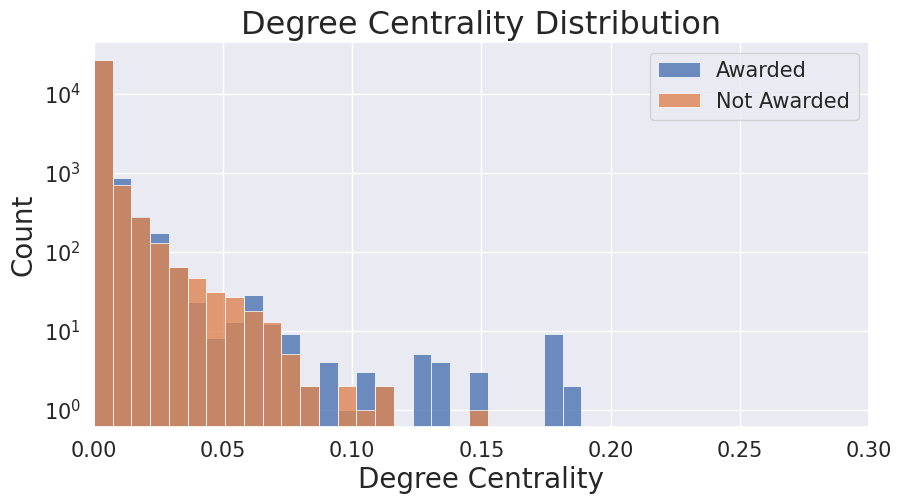

In [49]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='degree_cen',hue='awarded',bins=100,
             # change color
             palette=[sns.color_palette()[1],sns.color_palette()[0]],alpha=0.8)
plt.title('Degree Centrality Distribution',fontsize=23)
plt.xlabel('Degree Centrality',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlim(0,0.3)
plt.legend(['Awarded','Not Awarded'],fontsize=15)
plt.show()

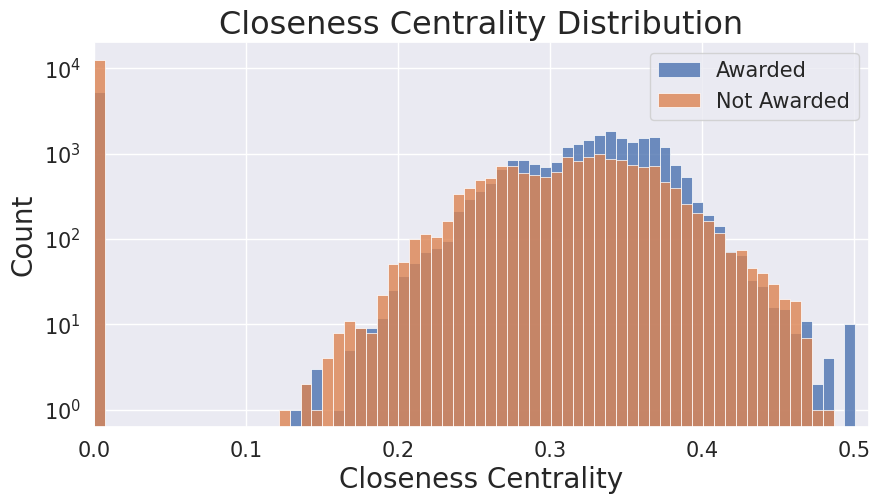

In [56]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='close_cen',hue='awarded',bins=100,
             # change color
             palette=[sns.color_palette()[1],sns.color_palette()[0]],alpha=0.8)
plt.title('Closeness Centrality Distribution',fontsize=23)
plt.xlabel('Closeness Centrality',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlim(0,0.51)
plt.legend(['Awarded','Not Awarded'],fontsize=15)
plt.show()

# graph

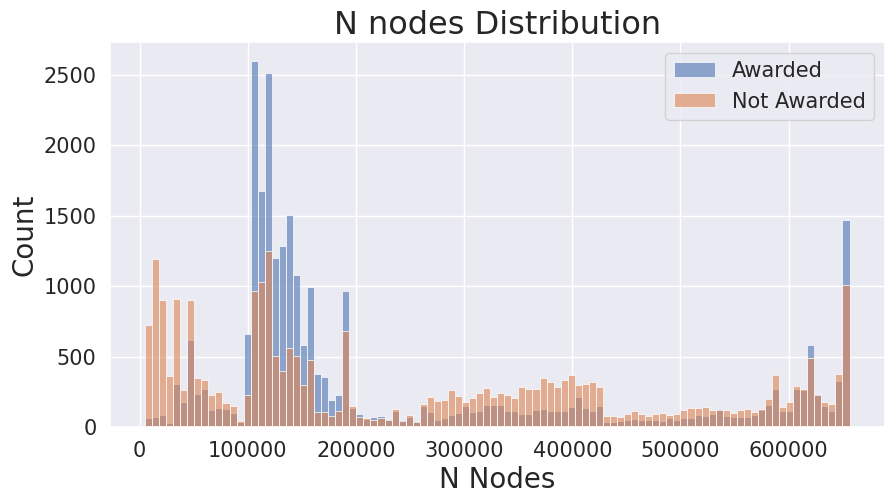

In [60]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='N_nodes',hue='awarded',bins=100,
             # change color
             palette=[sns.color_palette()[1],sns.color_palette()[0]],alpha=0.6)
plt.title('N nodes Distribution',fontsize=23)
plt.xlabel('N Nodes',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yscale('log')
plt.legend(['Awarded','Not Awarded'],fontsize=15)
plt.show()

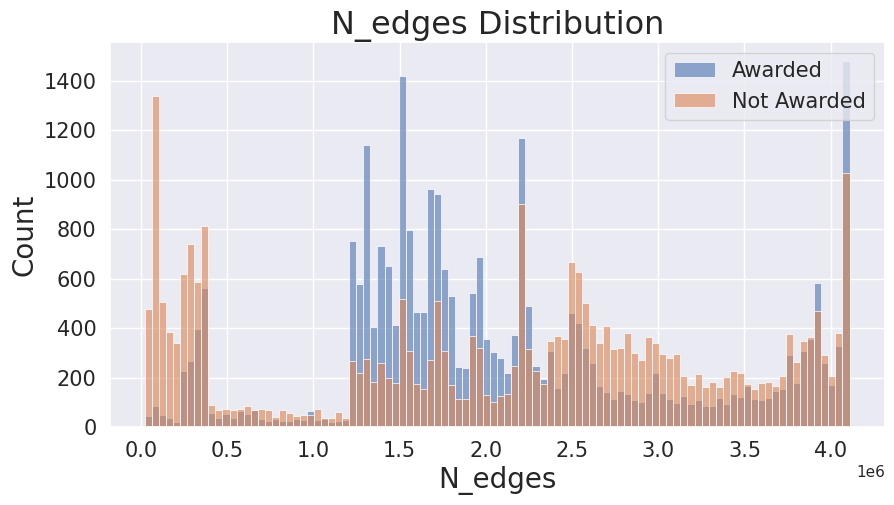

In [61]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='N_edges',hue='awarded',bins=100,
             # change color
             palette=[sns.color_palette()[1],sns.color_palette()[0]],alpha=0.6)
plt.title('N_edges Distribution',fontsize=23)
plt.xlabel('N_edges',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yscale('log')
plt.legend(['Awarded','Not Awarded'],fontsize=15)
plt.show()

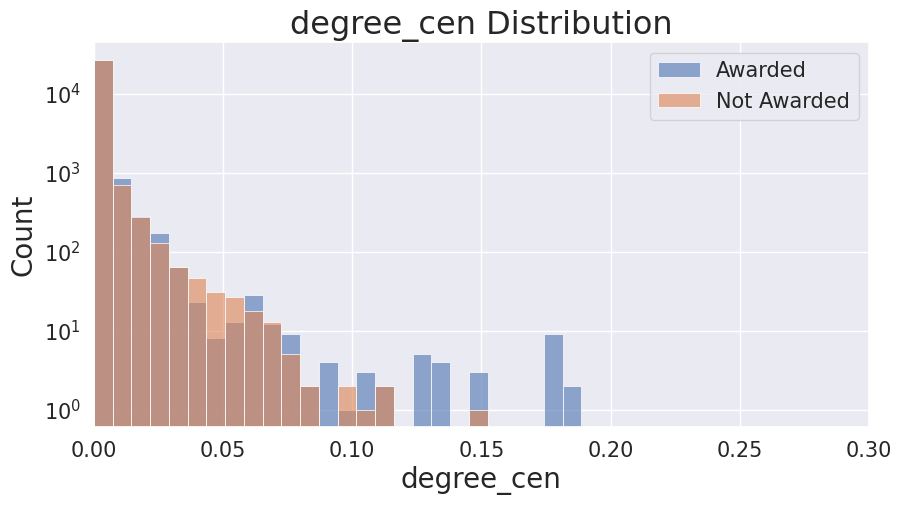

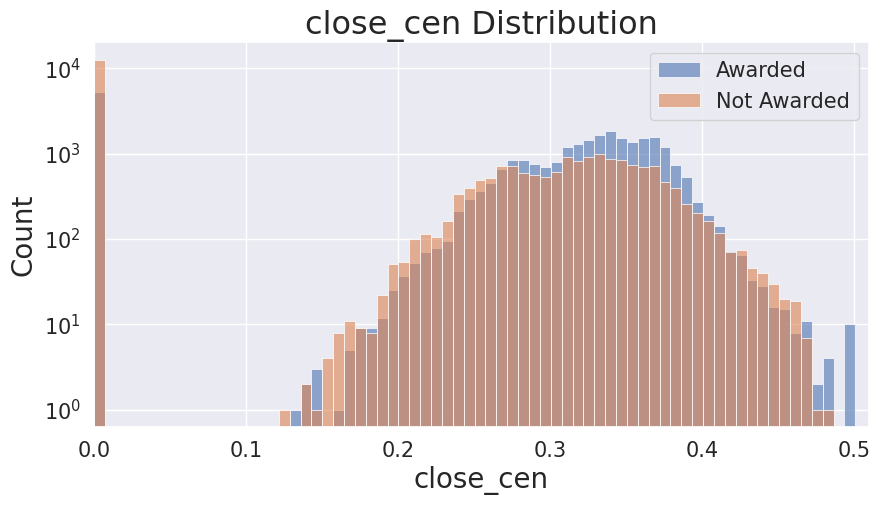

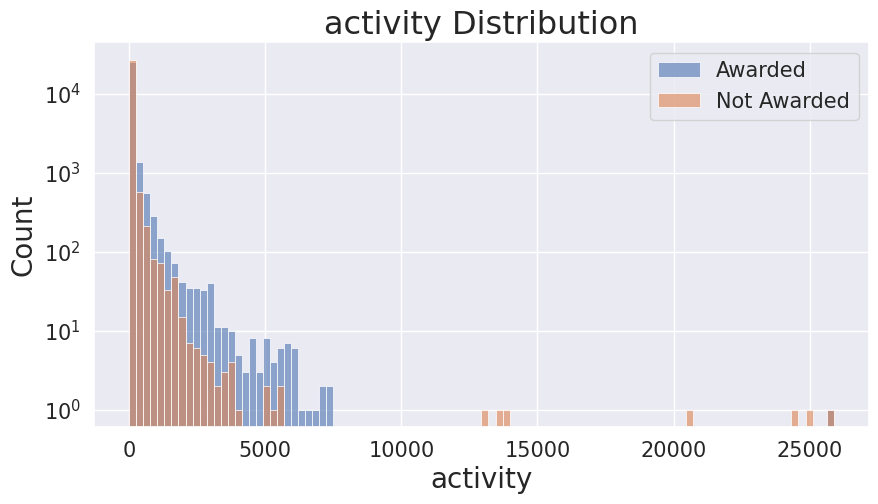

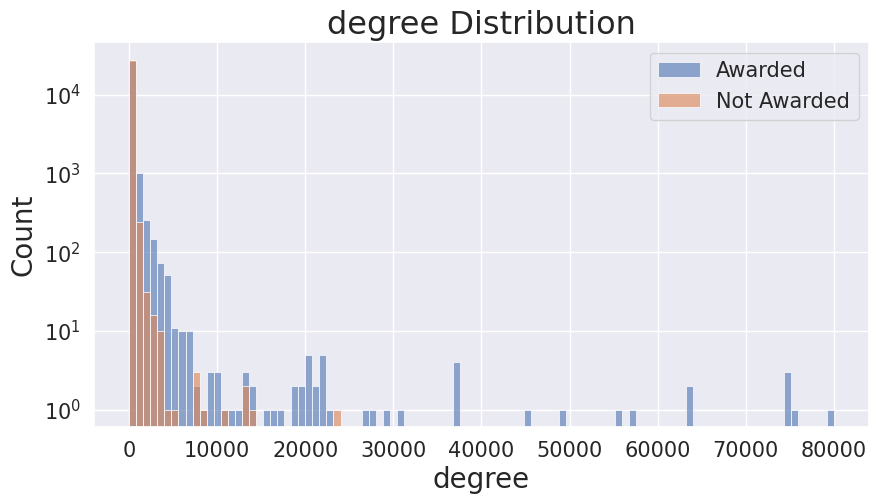

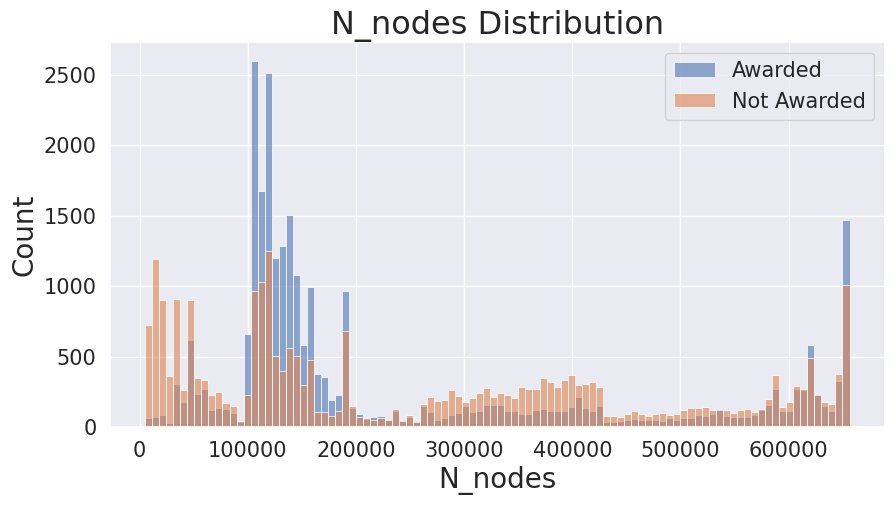

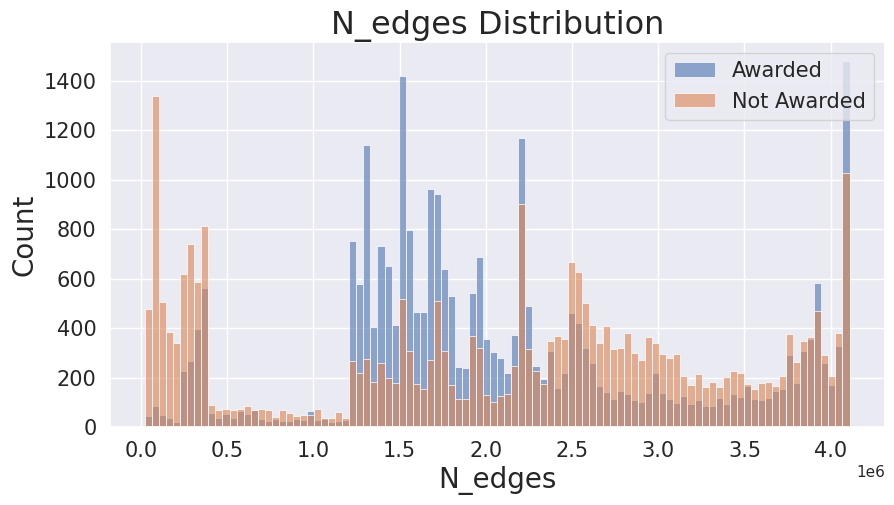

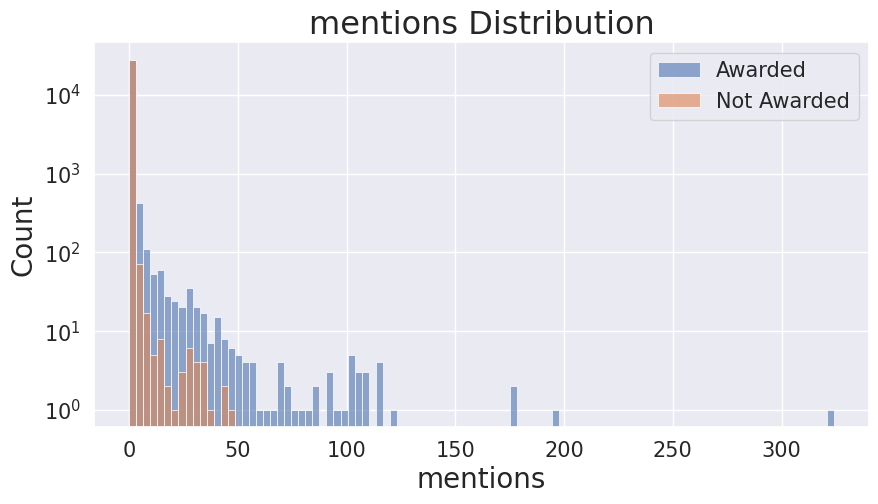

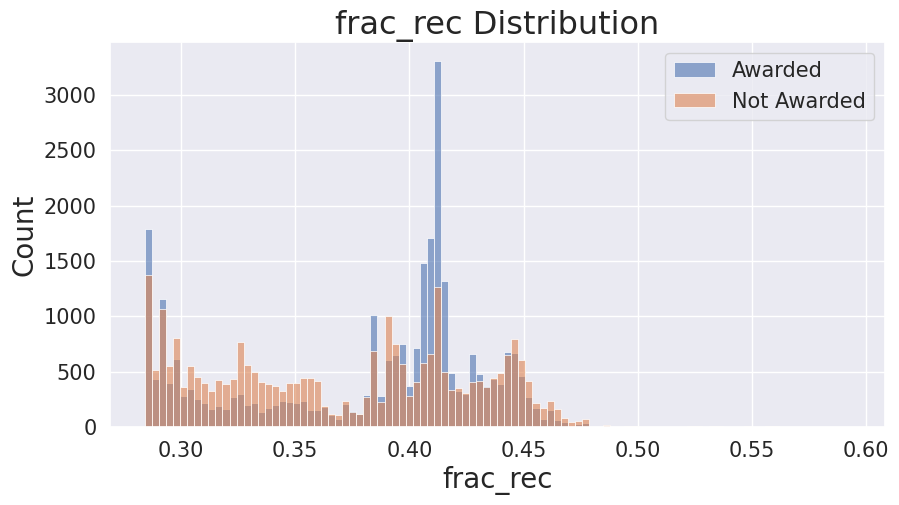

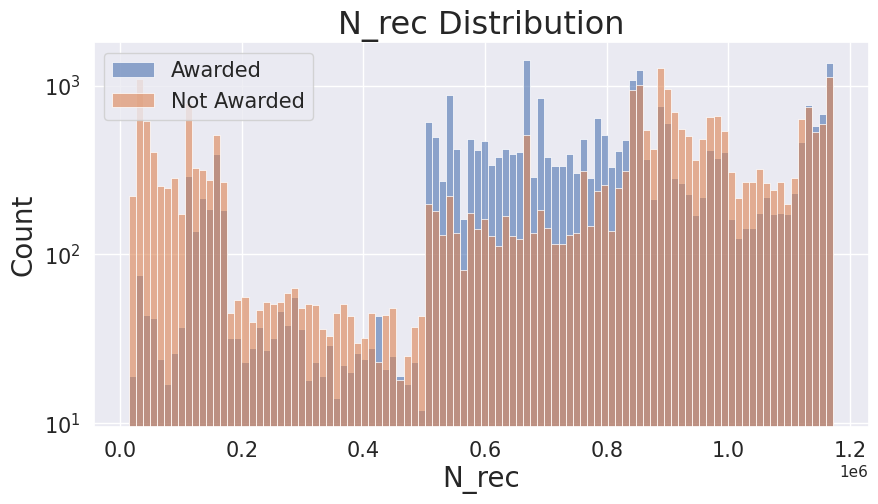

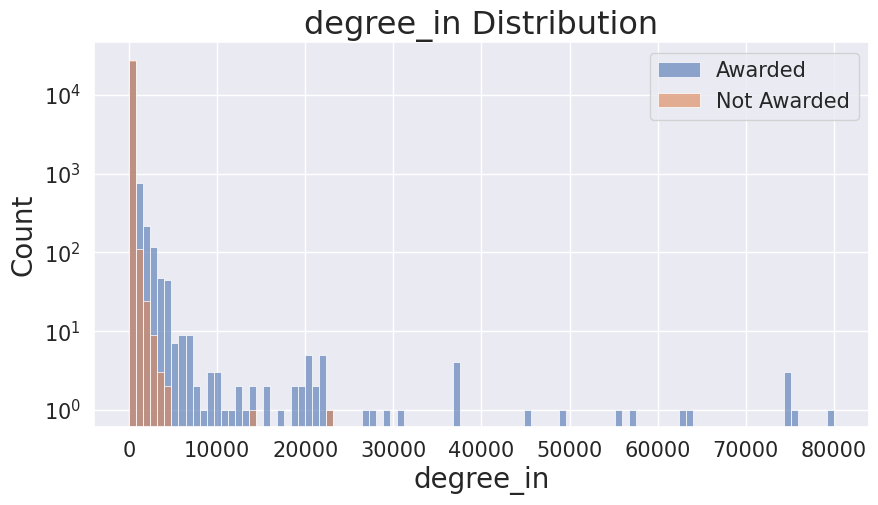

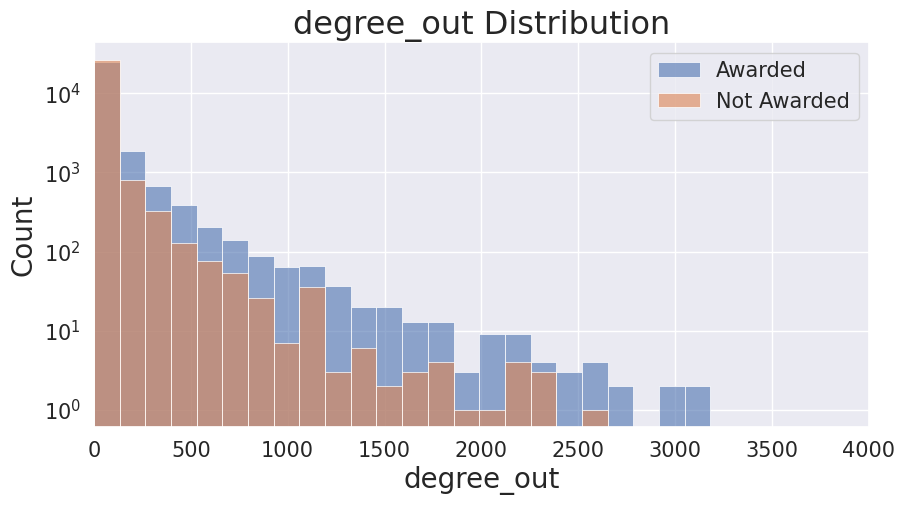

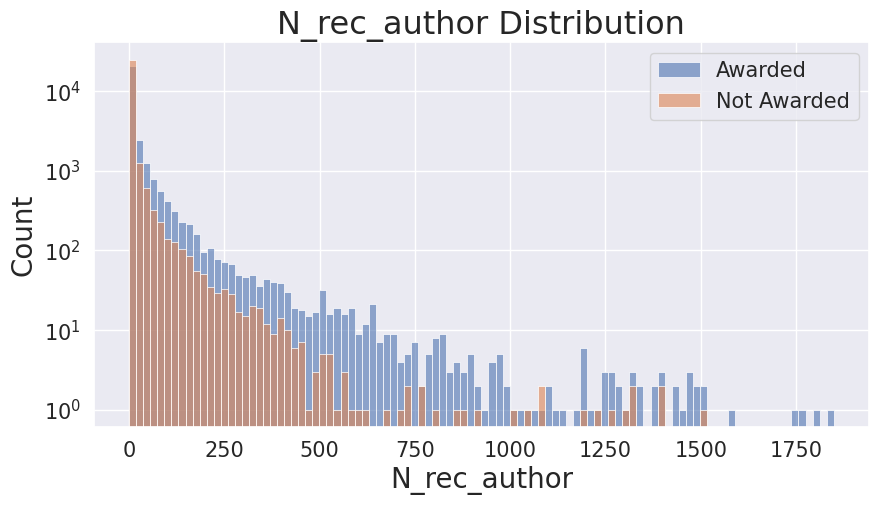

In [71]:
features = ['degree_cen', 'close_cen', 'activity', 'degree', 'N_nodes', 'N_edges', 
            'mentions','frac_rec','N_rec','degree_in','degree_out','N_rec_author']

log_features = ['degree_cen','close_cen', 'activity','degree','mentions','degree_in','degree_out','N_rec_author','N_rec']

for feat in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df,x=feat,hue='awarded',bins=100,
                # change color
                palette=[sns.color_palette()[1],sns.color_palette()[0]],alpha=0.6)
    plt.title(str(feat)+' Distribution',fontsize=23)
    plt.xlabel(feat,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if feat in log_features:
        plt.yscale('log')
    
    if feat == 'degree_cen':
        plt.xlim(0,0.3)
    
    if feat == 'close_cen':
        plt.xlim(0,0.51)
    
    if feat == 'degree_out':
        plt.xlim(0,4000)
    plt.legend(['Awarded','Not Awarded'],fontsize=15)
    plt.show()